In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#ALTERNATIVE="from_scratch"
ALTERNATIVE="pretrained"

NOISE_LEVEL=0.1
df = pd.read_parquet(f"alexnet_{NOISE_LEVEL}_{ALTERNATIVE}.parquet")
df

,output,value
0,0,-4.984354
1,1,-6.829536
2,2,-3.802934
3,3,12.592919
4,4,-1.100759
...,...,...
99995,5,-0.354681
99996,6,-2.213614
99997,7,0.745078
99998,8,-2.104405


In [3]:
min_val = int(df["value"].min())-1
max_val = int(df["value"].max())+1
min_val, max_val

(-9, 17)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


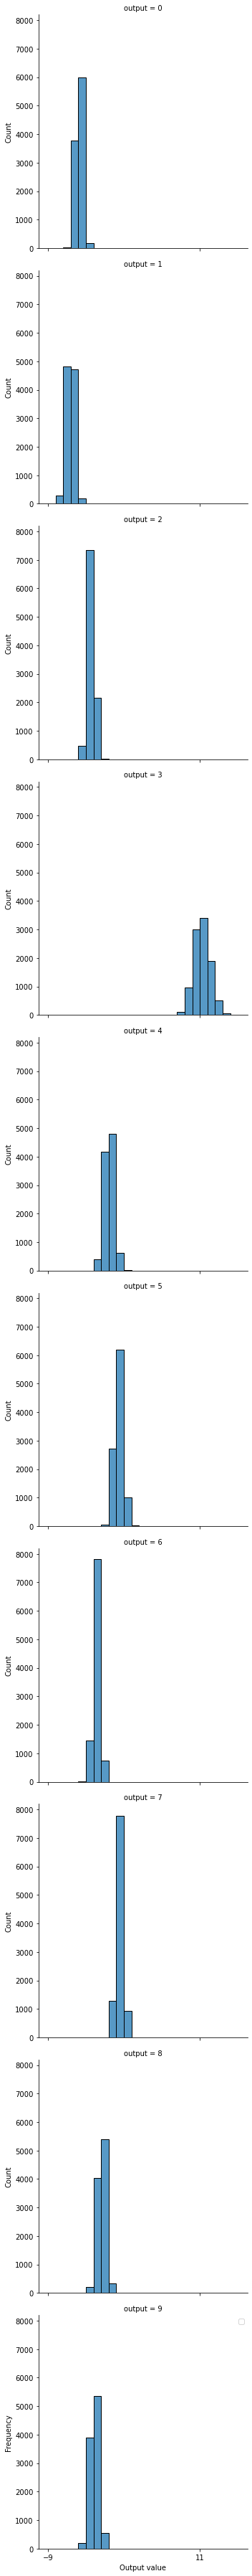

In [4]:
g = sns.FacetGrid(df, row='output', height=5, aspect=1)
g.map(sns.histplot, 'value', bins=range(min_val, max_val, 1), kde=False)
plt.xlabel('Output value')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(range(min_val, max_val, 20))
plt.savefig(f"noisy_outputs/outputs_{NOISE_LEVEL}_{ALTERNATIVE}.png")
plt.show()